In [1]:
from __future__ import division
from math import sqrt
import argparse
import random
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import time
from typing import List, Dict
import pickle
from tqdm import tqdm
import pickle
import sys
from types import NoneType
import pybullet as p
import pybullet_data
import numpy as np
import time
import argparse
import math
import os
import random
import sys
from collision_utils import get_collision_fn



In [2]:
physicsClient = p.connect(p.DIRECT)
# physicsClient = p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(enableFileCaching=0)
p.setGravity(0, 0, -9.8)
# p.configureDebugVisualizer(p.COV_ENABLE_GUI, False)
# p.configureDebugVisualizer(p.COV_ENABLE_SHADOWS, True)
# p.resetDebugVisualizerCamera(cameraDistance=1.400, cameraYaw=58.000,
#                              cameraPitch=-42.200, cameraTargetPosition=(0.0, 0.0, 0.0))

# load objects
plane=p.loadURDF("plane.urdf")
ur5=p.loadURDF('assets/ur5/ur5.urdf',
                    basePosition=[0, 0, 0.02], useFixedBase=True)
obstacle1=p.loadURDF('assets/block.urdf',
                        basePosition=[1/4, 0, 1/2],
                        useFixedBase=True)
obstacle2=p.loadURDF('assets/block.urdf',
                        basePosition=[2/4, 0, 2/3],
                        useFixedBase=True)
obstacle3=p.loadURDF('assets/block.urdf',
                            basePosition=[-3/4, 0, 1/2],
                            useFixedBase=True)
obstacle4=p.loadURDF('assets/block.urdf',
                            basePosition=[0, 3/5, 1/3],
                            useFixedBase=True)
obstacle5=p.loadURDF('assets/block.urdf',
                            basePosition=[0, -1/8, 2/3],
                            useFixedBase=True)
obstacle6=p.loadURDF('assets/block.urdf',
                            basePosition=[-1/4, 1/3, 3/5],
                            useFixedBase=True)
obstacle7=p.loadURDF('assets/block.urdf',
                        basePosition=[2/4, -1/4, 2/3],
                        useFixedBase=True)


In [3]:
obstacle1 = [1/4, 0, 1/2]
obstacle2 = [2/4, 0, 2/3]
obstacle3 = [-3/4, 0, 1/2]
obstacle4 = [0, 3/5, 1/3]
obstacle5 = [0, -1/8, 2/3]
obstacle6 = [-1/4, 1/3, 3/5]
obstacle7 = [2/4, -1/4, 2/3]

env1 = [obstacle1, obstacle2, obstacle3, obstacle4, obstacle5, obstacle6, obstacle7]

# save the environment
with open('env1.pkl', 'wb') as f:
    pickle.dump(env1, f)

    

In [ ]:
obstacle1 = [1/4, 0, 1/2]
obstacle2 = [2/4, 0, 2/3]
obstacle3 = [-3/4, 0, 1/2]
obstacle4 = [0, 3/5, 1/3]
obstacle5 = [0, -1/8, 2/3]
obstacle6 = [-1/4, 1/3, 3/5]
obstacle7 = [2/4, -1/4, 2/3]

env1 = [obstacle1, obstacle2, obstacle3, obstacle4, obstacle5, obstacle6, obstacle7]

# save the environment
with open('env1.pkl', 'wb') as f:
    pickle.dump(env1, f)

    

In [26]:

def sample_in_sphere():
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    z = np.random.uniform(0, 1)
    while x**2 + y**2 + z**2 > 1:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        z = np.random.uniform(0, 1)
    return [x, y, z]



In [53]:
import numpy as np
import pickle

for e in range(2, 8, 1000):
    env = []
    for i in range(7):

        
        obstacle = sample_in_sphere()
        while obstacle[0] == 0 and obstacle[1] == 0:
            obstacle = sample_in_sphere()

            
            
        # else:
        #     obstacle = [np.random.uniform(-0.9, 0.9), np.random.uniform(-0.9, 0.9), np.random.uniform(0.1, 0.9)]
        #     while obstacle[0] == 0 and obstacle[1] == 0:
        #         obstacle = [np.random.uniform(-0.9, 0.9), np.random.uniform(-0.9, 0.9), np.random.uniform(0.1, 0.9)]

        env.append(obstacle)

    print(e)
    with open('env{}.pkl'.format(e), 'wb') as f:
        pickle.dump(env, f)


2


In [21]:
env = [[0.8571629731579999, 0.6265103729952084, 0.3471196473942315],
       [-0.23572740792252966, -0.34768747022821633, 0.4094648362348753],
       [-0.5935871550628429, -0.19308073866782427, 0.5919359147281367],
       [-0.19516005202327324, -0.38516248113235463, 0.11631432532523434],
       [-0.1743053367792663, 0.5402296493213069, 0.5716187294540082],
       [-0.6894889262695391, -0.14930079010752728, 0.6456047696946434],
       [-0.3751730638986268, 0.3210783090554462, 0.4139656344954078],
       [-0.11529386199878866, -0.4235130693159302, 0.6909135547591133],
       [0.6372993911220851, 0.6638316415440011, 0.278735328699663],
       [0.2888075548431074, -0.6903188218911935, 0.2527746794813169]]


In [25]:
obstacle1 = [-1/4, 0, 1/2]
obstacle2 = [2/4, 0, 2/3]
obstacle3 = [3/4, 0, 1/2]
obstacle4 = [0, -3/5, 1/3]
obstacle5 = [0, -1/8, 2/3]
obstacle6 = [2/4, -1/3, 3/5]
obstacle7 = [-3/4, -2/4, 3/3]

env = [obstacle1, obstacle2, obstacle3, obstacle4, obstacle5, obstacle6, obstacle7]

# save the environment
with open('env0.pkl', 'wb') as f:
    pickle.dump(env, f)

Text(0.5, 0, 'Z Label')

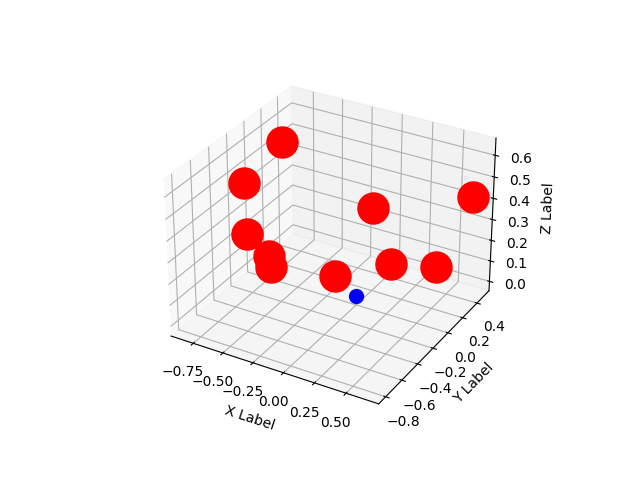

In [28]:
# load environ 5
with open('env4.pkl', 'rb') as f:
    env5 = pickle.load(f)

# print(env5)

env = env5
# plot the environment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(env)):
    ax.scatter(env[i][0], env[i][1], env[i][2], c='r', marker='o', s=500)

ax.scatter(0, 0, 0, c='b', marker='o', s=100)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

